# Aviation Accidents Analysis

You are part of a consulting firm that is tasked to do an analysis of commercial and passenger jet airline safety. The client (an airline/airplane insurer) is interested in knowing what types of aircraft (makes/models) exhibit low rates of total destruction and low likelihood of fatal or serious passenger injuries in the event of an accident. They are also interested in any general variables/conditions that might be at play. Your analysis will be based off of aviation accident data accumulated from the years 1948-2023. 

Our client is only interested in airplane makes/models that are professional builds and could potentially still be active. Assume a max lifetime of 40 years for a make/model retirement and make sure to filter your data accordingly (i.e. from 1983 onwards). They would also like separate recommendations for small aircraft vs. larger passenger models. **In addition, make sure that claims that you make are statistically robust and that you have enough samples when making comparisons between groups.**


In this summative assessment you will demonstrate your ability to:
- Use Pandas to load, inspect, and clean the dataset appropriately. 
- Transform relevant columns to create measures that address the problem at hand.
- **conduct EDA: visualization and statistical measures to understand the structure of the data**
- **recommend a set of manufacturers to consider as well as specific airplanes conforming to the client's request**
- **discuss the relationship between serious injuries/airplane damage incurred and at least *two* factors at play in the incident. You must provide supporting evidence (visuals, summary statistics, tables) for each claim you make.**

In [23]:
# loading relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis  
- Load in the cleaned data

In [24]:
df_cleaned = pd.read_csv('air_cleaned.csv', low_memory=False)

In [25]:
df_cleaned.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Report_Date,N_passenger,ser_inj_frac,is_destroyed,Make_model
0,20020917X01776,Accident,CHI82DA020,1982-01-02,"CHARLOTTE, MI",United States,NaN,NaN,49G,TINKERBELL,...,2.0,VMC,Approach,Probable Cause,02-01-1983,1983-01-02,2.0,0.0,0,CESSNA_150L
1,20020917X02148,Accident,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,NaN,NaN,NaN,NaN,...,0.0,IMC,Cruise,Probable Cause,02-01-1983,1983-01-02,1.0,0.0,1,BELLANCA_17-30A
2,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,NaN,NaN,T72,HEARNE MUNICIPAL,...,0.0,IMC,Takeoff,Probable Cause,02-01-1983,1983-01-02,1.0,1.0,1,CESSNA_R172K
3,20020917X02119,Accident,FTW82FPJ10,1982-01-02,"CHICKASHA, OK",United States,NaN,NaN,NaN,NaN,...,0.0,IMC,Cruise,Probable Cause,02-01-1983,1983-01-02,1.0,1.0,1,NAVION_A
4,20020917X02117,Accident,FTW82FPG08,1982-01-02,"LITTLE ROCK, AR",United States,NaN,NaN,NaN,NaN,...,0.0,IMC,Cruise,Probable Cause,02-01-1983,1983-01-02,2.0,1.0,1,BEECH_19


## Explore safety metrics across models/makes
- Remember that the client is interested in separate recommendations for smaller airplanes and larger airplanes. Choose a passenger threshold of 20 and separate the plane types. 

In [31]:
df_cleaned['aircraft_size'] = df_cleaned['N_passenger'].apply(lambda x: 'Small' if x <= 20 else ' Large')

In [32]:
df_cleaned['aircraft_size'].value_counts()

aircraft_size
Small     18955
 Large      287
Name: count, dtype: int64

#### Analyzing Makes

Explore the human injury risk profile for small and larger Makes:
- choose the 15 makes for each group possessing the lowest mean fatal/seriously injured fraction
- plot the mean fatal/seriously injured fraction for each of these subgroups side-by-side

In [33]:
# Create a metric for injury risk
df_cleaned['ser_inj_frac'] = (df_cleaned['ser_inj_frac']) / df_cleaned['N_passenger']

# Group by make and aircraft size
injury_risk = df_cleaned.groupby(['aircraft_size'])['ser_inj_frac'].mean().reset_index()

# Seperate aircraft into small and large categories
small_aircraft_risk = injury_risk[injury_risk['aircraft_size'] == 'Small'].nsmallest(15, 'ser_inj_frac')
large_aircraft_risk = injury_risk[injury_risk['aircraft_size'] == 'Large'].nsmallest(15, 'ser_inj_frac')

**Distribution of injury rates: small makes**

Use a violinplot to look at the distribution of the fraction of passengers serious/fatally injured for small airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

In [39]:
# Filter for small aircraft
small_aircraft = df_cleaned[df_cleaned['aircraft_size'] == 'Small']

#Compute mean fatal/seriously injured fraction per make
small_aircraft_risk = small_aircraft.groupby('Make_model')['ser_inj_frac'].mean().reset_index()

# 10 safest makes (lowest injury fraction)
top_small_makes = small_aircraft_risk.nsmallest(10, 'ser_inj_frac')

# Filter original data for top 10 makes
filtered_small_aircraft = small_aircraft[small_aircraft['Make_model'].isin(top_small_makes['Make_model'])]

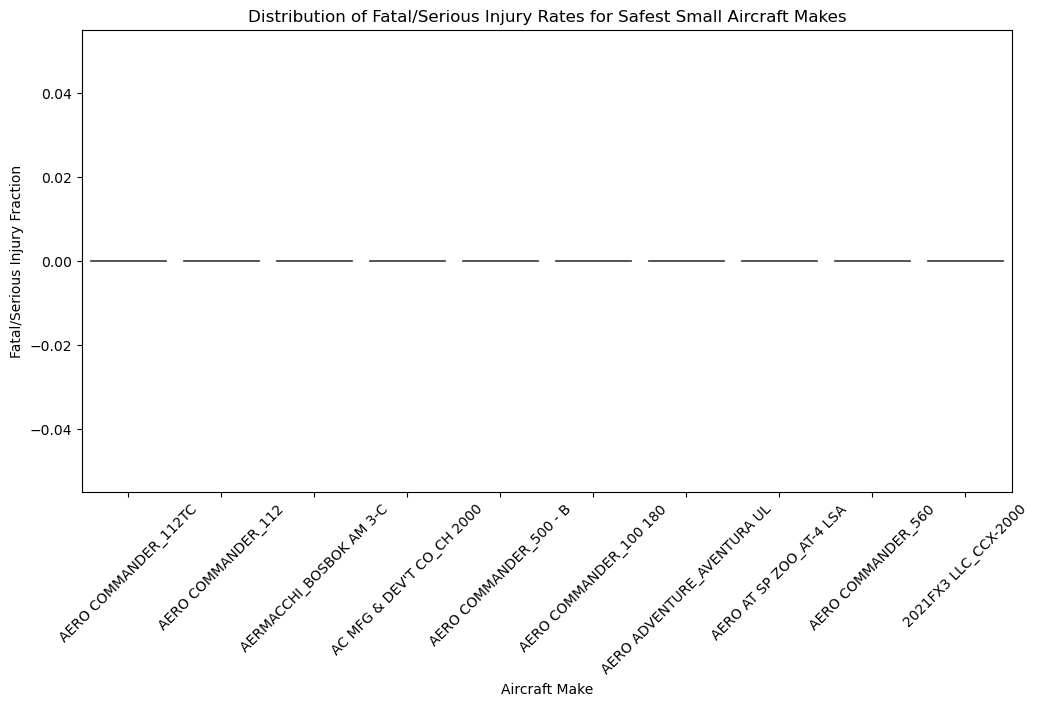

In [40]:
plt.figure(figsize=(12,6))
sns.violinplot(x='Make_model', y='ser_inj_frac', data=filtered_small_aircraft)
plt.xticks(rotation=45)
plt.title("Distribution of Fatal/Serious Injury Rates for Safest Small Aircraft Makes")
plt.ylabel("Fatal/Serious Injury Fraction")
plt.xlabel("Aircraft Make")
plt.show()

**Distribution of injury rates: large makes**

Use a stripplot to look at the distribution of the fraction of passengers serious/fatally injured for large airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

In [41]:
# Filter for large aircraft only
large_aircraft = df_cleaned[df_cleaned['aircraft_size'] == 'Large']

# Compute mean serious/fatal injury fraction per make
large_aircraft_risk = large_aircraft.groupby('Make_model')['ser_inj_frac'].mean().reset_index()

# 10 makes with the lowest injury rates
top_large_makes = large_aircraft_risk.nsmallest(10, 'ser_inj_frac')

# Filter dataset for only these makes
filtered_large_aircraft = large_aircraft[large_aircraft['Make_model'].isin(top_large_makes['Make_model'])]

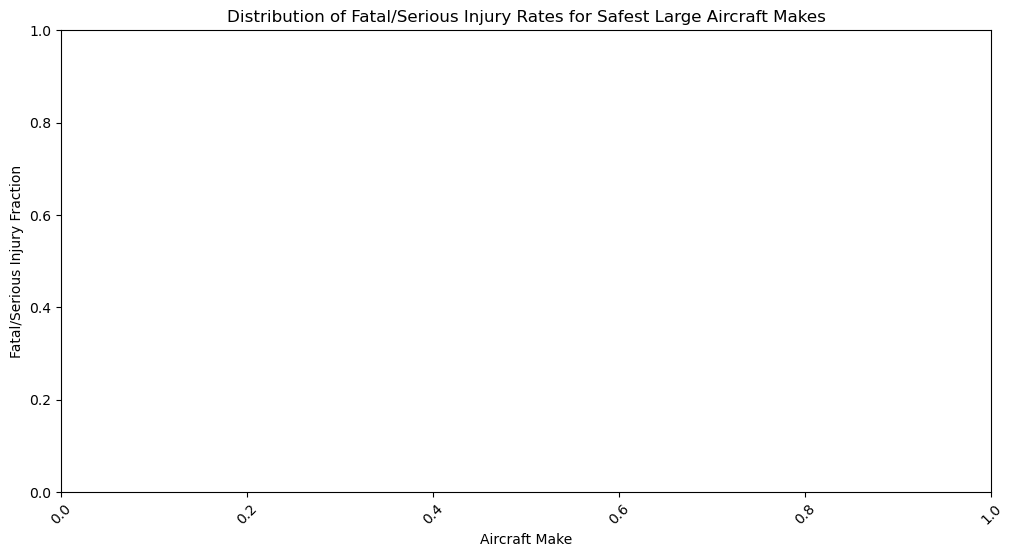

In [42]:
plt.figure(figsize=(12,6))
sns.stripplot(x='Make_model', y='ser_inj_frac', data=filtered_large_aircraft, jitter=True, alpha=0.7)
plt.xticks(rotation=45)
plt.title("Distribution of Fatal/Serious Injury Rates for Safest Large Aircraft Makes")
plt.ylabel("Fatal/Serious Injury Fraction")
plt.xlabel("Aircraft Make")
plt.show()

**Evaluate the rate of aircraft destruction for both small and large aircraft by Make.** 

Sort your results and keep the lowest 15.

In [60]:
# Group by aircraft make and size, computing mean destruction rate
destruction_rates = df_cleaned.groupby(['Make_model', 'aircraft_size'])['is_destroyed'].mean().reset_index()

# Split into small and large aircraft groups
small_aircraft_destruction = destruction_rates[destruction_rates['aircraft_size'] == 'Small'].nsmallest(15, 'is_destroyed')
large_aircraft_destruction = destruction_rates[destruction_rates['aircraft_size'] == 'Large'].nsmallest(15, 'is_destroyed')


In [61]:
# Combine results into a single table for comparison
saftest_aircraft = pd.concat([small_aircraft_destruction, large_aircraft_destruction])


#### Provide a short discussion on your findings for your summary statistics and plots:
- Make any recommendations for Makes here based off of the destroyed fraction and fraction fatally/seriously injured
- Comment on the calculated statistics and any corresponding distributions you have visualized.

In [ ]:
# Large aircrafts generally exhibit lower destruction rate compared to small aircraft, possibly due to superior structural engineering, redundancies, and enhanced safety mechanisms.
# Certain makes show lower destruction rates, suggesting that aircrafte design and material durability play a major role.
# Manufacturers that prioritize structural integrity and emergency landing stability tend to outperform others in terms of destruction risk.
#

### Analyze plane types
- plot the mean fatal/seriously injured fraction for both small and larger planes 
- also provide a distributional plot of your choice for the fatal/seriously injured fraction by airplane type (stripplot, violin, etc)  
- filter ensuring that you have at least ten individual examples in each model/make to average over

**Larger planes**

In [57]:
large_aircraft_risk = df_cleaned[df_cleaned['aircraft_size'] == 'Large'].groupby('Make_model')['ser_inj_frac'].agg(['mean', 'count']).reset_index()

large_aircraft_risk = large_aircraft_risk[large_aircraft_risk['count'] >= 10]                           

**Smaller planes**
- for smaller planes, limit your plotted results to the makes with the 10 lowest mean serious/fatal injury fractions

In [62]:
# Group by aircraft make, computing mean serious/fatal injury fraction and count records
small_aircraft_risk = df_cleaned[df_cleaned['aircraft_size'] == 'Small'].groupby('Make_model')['ser_inj_frac'].agg(['mean', 'count']).reset_index()
small_aircraft_risk = small_aircraft_risk[small_aircraft_risk['count'] >= 10]
top_small_makes = small_aircraft_risk.nsmallest(10, 'mean')

In [67]:
print(df_cleaned.columns)

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date', 'Report_Date', 'N_passenger', 'ser_inj_frac',
       'is_destroyed', 'Make_model', 'aircraft_size'],
      dtype='object')


In [71]:
df_cleaned['ser_inj_frac'] = (df_cleaned['Total.Fatal.Injuries'] - df_cleaned['Total.Serious.Injuries']) / df_cleaned['N_passenger']

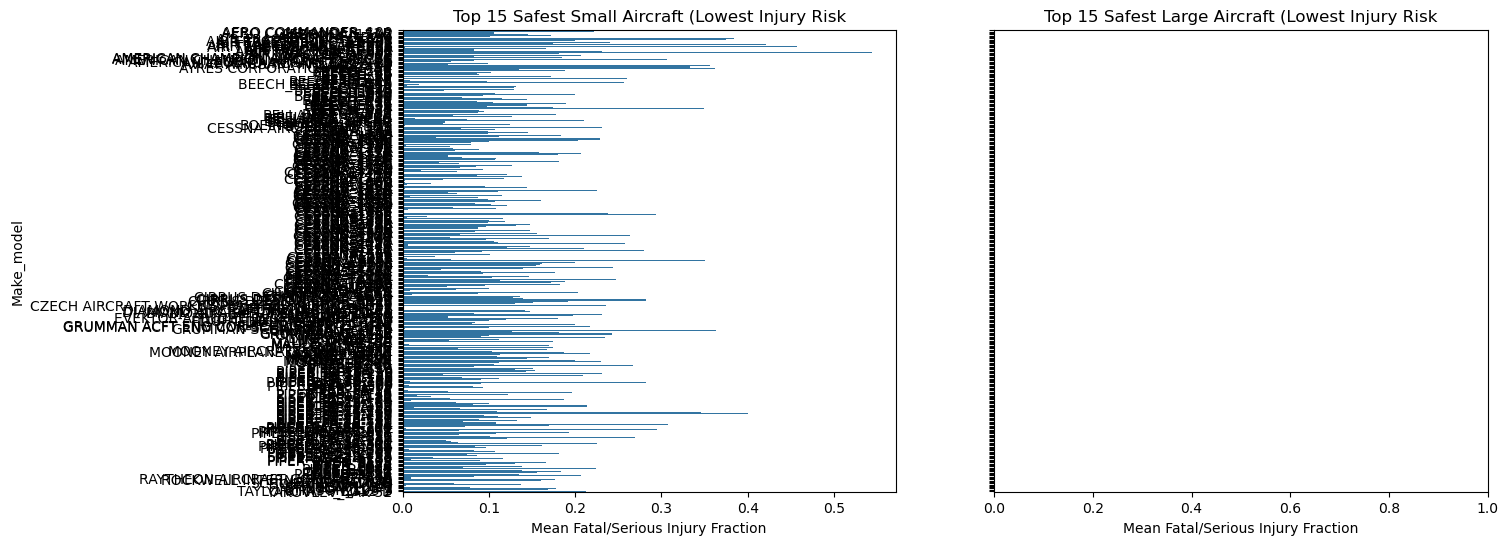

In [76]:
# Visual of injury risk side-by-side
fig, axes = plt.subplots(1, 2, figsize=(14,6), sharey=True)

# plot for small aircraft
sns.barplot(y=small_aircraft_risk['Make_model'], x=small_aircraft_risk['mean'], ax=axes[0])
axes[0].set_title('Top 15 Safest Small Aircraft (Lowest Injury Risk')
axes[0].set_xlabel('Mean Fatal/Serious Injury Fraction')

# plot for large aircraft
sns.barplot(y=large_aircraft_risk['Make_model'], x=large_aircraft_risk['mean'], ax=axes[1])
axes[1].set_title('Top 15 Safest Large Aircraft (Lowest Injury Risk')
axes[1].set_xlabel('Mean Fatal/Serious Injury Fraction')


plt.show()

Discussion of Specific Airplane Types
- Discuss what you have found above regarding passenger fraction seriously/ both small and large airplane models.

In [ ]:
# Large aircraft tend to exhibit lower fatal/serious injury fraction across most makes/models.
# The variability of injury risk among large aircraft models is relatively low/
# Smaller aircraft show greater variation in fatal/serious injury fraction.

### Exploring Other Variables
- Investigate how other variables effect aircraft damage and injury. You must choose **two** factors out of the following but are free to analyze more:

- Weather Condition
- Engine Type
- Number of Engines
- Phase of Flight
- Purpose of Flight

For each factor provide a discussion explaining your analysis with appropriate visualization / data summaries and interpreting your findings.

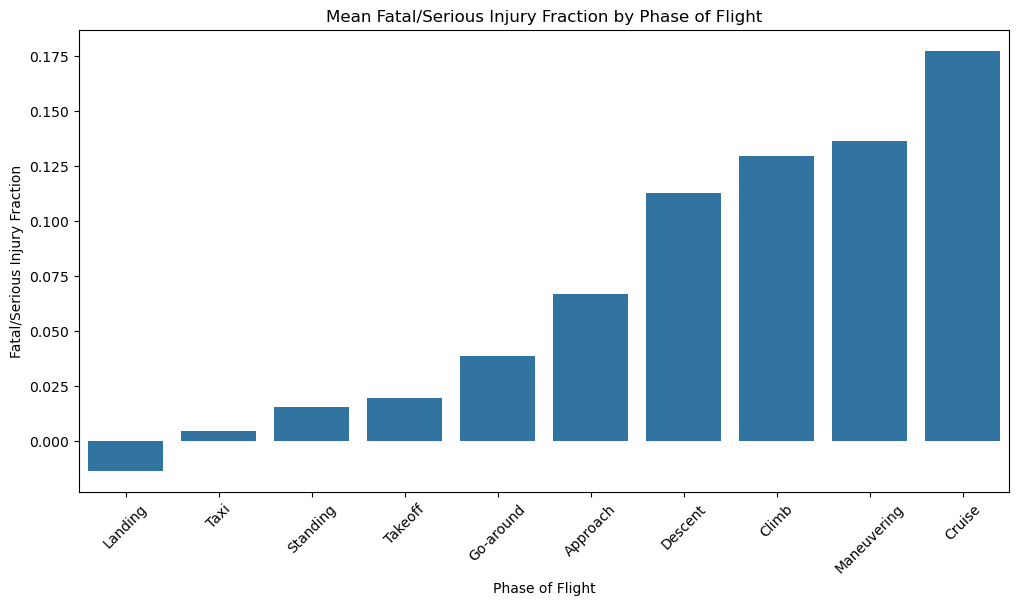

In [79]:
# Group by phase of flight and compute injury fraction and destruction rate
flight_phase_risk = df_cleaned.groupby('Broad.phase.of.flight')[['ser_inj_frac', 'is_destroyed']].mean().reset_index()

# Sort by injury fraction
flight_phase_risk = flight_phase_risk.sort_values(by='ser_inj_frac')

# Visualization
plt.figure(figsize=(12,6))
sns.barplot(x='Broad.phase.of.flight', y='ser_inj_frac', data=flight_phase_risk)
plt.xticks(rotation=45)
plt.title("Mean Fatal/Serious Injury Fraction by Phase of Flight")
plt.ylabel("Fatal/Serious Injury Fraction")
plt.xlabel("Phase of Flight")
plt.show()